In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

TeamNames = ["Arick Smith", "Stephen Engst"]

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
#Begin by reading in our test and training data. Since the data came in a train and test we don't really need to do a split on the information
#As it's already split.
training_spacetitanic_df = pd.read_csv("train.csv")
testing_spacetitanic_df = pd.read_csv("test.csv")

print(training_spacetitanic_df.shape)
print(len(training_spacetitanic_df))

(8693, 14)
8693


In [14]:
#A simple look at the information
training_spacetitanic_df.sort_index()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [21]:
training_spacetitanic_nan = training_spacetitanic_df.replace("?", np.nan)
testing_spacetitanic_nan = testing_spacetitanic_df.replace("?", np.nan)

print("INFO")
print(training_spacetitanic_nan.info())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

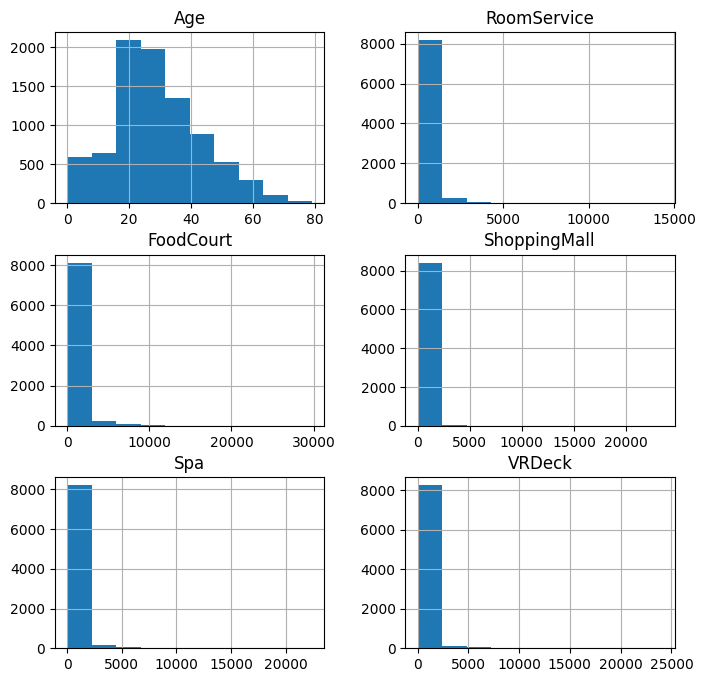

In [24]:
#The numerical data visualized for ease not any of the object columns
training_spacetitanic_df.hist(figsize=(8,8))

In [26]:
#Transformations:
# PassengerId - drop
# HomePlanet - Imputer ordinal
# CryoSleep - Imputer binary
# Cabin - Imputer OneHot Encoder
# Destination - Imputer ordinal
# Age - Imputer Scalar
# VIP - Imputer binary
# RoomService - Imputer Scalar
# FoodCourt - Imputer Scalar
# ShoppingMall - Imputer Scalar
# Spa - Imputer Scalar
# VRDeck - Imputer Scalar
# Name - passtrough
# Transported - binary


In [37]:
ordinal = ["HomePlanet", "Destination"]
binaryList = ["CryoSleep", "VIP"]
oneHot = ["Cabin"]
scalarInt = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
passThrough = ["Name"]
drop_feat = ["PassengerId"]
drop_feat_t = ["PassengerId", "Transported"]

target = "Transported"

In [38]:
X_train = training_spacetitanic_nan.drop(columns=drop_feat_t)
y_train = training_spacetitanic_nan[target]

X_test = testing_spacetitanic_nan.drop(columns=drop_feat)

In [41]:
colpipe = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse_output=False)),
        oneHot,
    ),
    (
        make_pipeline(SimpleImputer(strategy="median"), StandardScaler()),
        scalarInt,
    ),
    (
        make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder()),
        ordinal,
    ),
    (
        make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder()),
        binaryList,
    ),
)